In [2]:
#必要ライブラリのインストール
from src.data import data_complete
from src.model import result
from src.store import store
from src.store import read
from src.plot import plot_all
from src.plot import plot_predict
from src.plot import data_describe
from src.plot import plot_final_loss_vs_unit_sum
from src.custom_class import ConsecutiveEpochsEarlyStopping

import warnings

# 全ての警告を無視
warnings.filterwarnings('ignore', category=UserWarning)

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # エラーのみ表示


In [3]:
#データの読み込み及び加工、コラムリストの取得
colums_list, data_ex, data_original = data_complete()

キャッシュファイルからデータを読み込みます


In [4]:
#データの確認
data_ex

,processor_unit_units_status_cpu_board_cpu_fan,processor_unit_units_status_cpu_board_cpu_bd_fan1,processor_unit_units_status_cpu_board_cpu_bd_fan2,processor_unit_units_status_cpu_board_cpu_bd_temp,processor_unit_units_status_cpu_board_cpu_core_temp,processor_unit_units_status_cpu_board_gpu_core_temp,processor_unit_units_status_cpu_board_cpu_core_vol,processor_unit_units_status_cpu_board_cpu_bd_vbat,processor_unit_units_status_cpu_board_cpu_bd_p3_3v,processor_unit_units_status_cpu_board_cpu_bd_p5v,processor_unit_units_status_cpu_board_cpu_bd_p12v,measurement_date
0,0.735761,0.562054,0.902923,0.740751,0.638899,0.633343,0.324796,0.393949,0.68001,0.00001,0.073539,2015-12-22 06:15:00
1,0.766849,0.649645,0.913514,0.777788,0.666677,0.666677,0.977218,0.181828,0.68001,0.00001,0.000010,2015-12-22 07:00:02
2,0.797937,0.562054,0.928518,0.814825,0.694454,0.700010,0.868956,0.181828,0.84001,0.00001,0.073539,2015-12-22 08:00:03
3,0.834207,0.562054,0.924988,0.814825,0.694454,0.700010,0.817674,0.181828,0.68001,0.00001,0.073539,2015-12-22 09:00:03
4,0.735761,0.474463,0.924988,0.777788,0.666677,0.633343,0.524227,0.393949,0.68001,0.80001,0.073539,2015-12-22 10:00:03
...,...,...,...,...,...,...,...,...,...,...,...,...
26420,0.378248,0.364974,0.688448,0.444454,0.361121,0.466677,0.868956,0.000010,0.68001,1.00001,1.000010,2019-02-04 19:00:02
26421,0.378248,0.364974,0.792596,0.444454,0.361121,0.500010,0.834768,0.000010,0.00001,1.00001,1.000010,2019-02-04 20:00:02
26422,0.378248,0.277382,0.765235,0.444454,0.333343,0.466677,0.735053,0.000010,0.68001,1.00001,1.000010,2019-02-04 21:00:02
26423,0.378248,0.364974,0.724635,0.444454,0.333343,0.466677,0.501435,0.000010,0.68001,1.00001,1.000010,2019-02-04 22:00:02


ここからモデルの作成に入る

In [15]:
#ハイパーパラメータの設定

#オートエンコーダの重みの初期化方法
initializer = "glorot_normal"


#モデルの最小化関数のパラメータ
delta = 0.5

#最大エポック数
max_epochs = 100000

#ノード数
units = 11

#モデル決定の閾値（再構成誤差のパラメータ）
#この閾値を下回ることで十分な性能を持つモデルとする
error_threshold = 0.002
error_threshold = 0.16

# EarlyStoppingの設定
early_stopping_params = {
    'monitor': 'loss',
    'patience': 1,
    'min_delta': 0.1,
    'restore_best_weights': True,
    'verbose': 0,
    'mode': 'min'
}



In [ ]:
#実験の実行及び結果の格納
results_df, traindata_model_df, thresholds, loss_values = result(data_ex, colums_list,  initializer, error_threshold, max_epochs, early_stopping_params, units )

1回目の期間のモデル
該当期間の確認
はじまり(train)2016/6/01 00:00:00
終わり(train)2018/6/01 00:00:00
はじまり(test)2018/6/01 00:00:00
終わり(test)2018/7/01 00:00:00
1回目の期間のモデル作成開始
1回目の期間のトレーニングデータ数:17161
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
探索中: units_1_3=30, units_2=10, 初期化方法=glorot_normal, 試行回数=1
中間ユニット(1・3):30個,中間ユニット(2):10個、初期化回数1回目のモデル構築完了
モデルは収束しました。訓練は 3 エポックで停止しました。
中間ユニット(1・3):30個,中間ユニット(2):10個、初期化回数1回目のモデル学習
最終損失: 0.14821821451187134
------------------------------------------------------------------------------------------
閾値を下回るモデルを発見: units_1_3=30, units_2=10
ノードを更新します
ノード数の更新29へ
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
-----------------------

In [79]:
#結果の保存
store(results_df,"model_1")
store(thresholds,"thresholds_1")
store(traindata_model_df, "traindata_model_df_1")

In [9]:
#結果の抜き出し
results_df = read("model_1")
thresholds = read("thresholds_1")
traindata_model_df = read("traindata_model_df_1")

In [ ]:
#結果のプロット
plot_all(results_df,thresholds, colums_list, data_original)

In [ ]:
plot_predict(traindata_model_df, colums_list, data_ex)

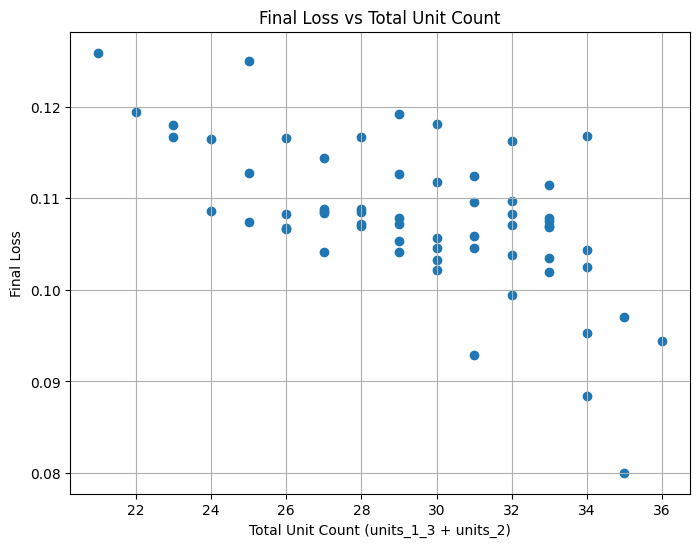

61


In [82]:
#収束の確認
plot_final_loss_vs_unit_sum(loss_values)
print(len(loss_values))

In [7]:
#モジュールの再リロード
import importlib
import src
import src.model

importlib.reload(src.model)
importlib.reload(src.plot)

#必要ライブラリのインストール
from src.data import data_complete
from src.model import result
from src.store import store
from src.store import read
from src.plot import plot_all
from src.plot import plot_predict
from src.plot import data_describe
from src.plot import plot_final_loss_vs_unit_sum
from src.custom_class import ConsecutiveEpochsEarlyStopping
